# PREDICTION OF GENRES USING MOVIE PLOTS 

**Own Code Line** | **External Code Lines** | **Existing Accuracy** | **Our Accuracy by MultiNomial Naive Bayes**  |**Our Accuracy by Random Forest** |**Time to Run**|
-------------|-------------|-------------|-------------|-------------|-------------
 252 | 284 | 78% | 81.9% | 72% | 60 min  |            


In [1]:
import pandas as pd
import numpy as np
import re
import nltk

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv('wiki_movies.csv')
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [5]:
print('The shape of our features is:', movies.shape)

The shape of our features is: (34886, 8)


In [6]:
# %load Visualization.py
def get_param():
    param = {'legend.fontsize' : 'Large',
              'figure.figsize'  : figsize,
              'axes.labelsize'  : 'x-large',
              'axes.titlesize'  : 'xx-large',
              'xtick.labelsize' : 'Large',
              'ytick.labelsize' : 'Large'}
    return param

def count_plt(x, y, df=movies, figsize=(18, 6)):
    # sns.set(style="ticks")
    sns.set(style="whitegrid")

    param = {'legend.fontsize': 'large',
              'figure.figsize' : figsize,
              'axes.labelsize' : 'x-large',
              'axes.titlesize' : 'xx-large',
              'xtick.labelsize': 'large',
              'ytick.labelsize': 'large'}
    plt.rcParams.update(param)


    ax = sns.countplot(x=x, y=y, data=df)
    if y: plt.title(y)
    else: plt.title(x)
    plt.xticks(rotation=90)

    plt.show()

## Movie Count Per Release Year

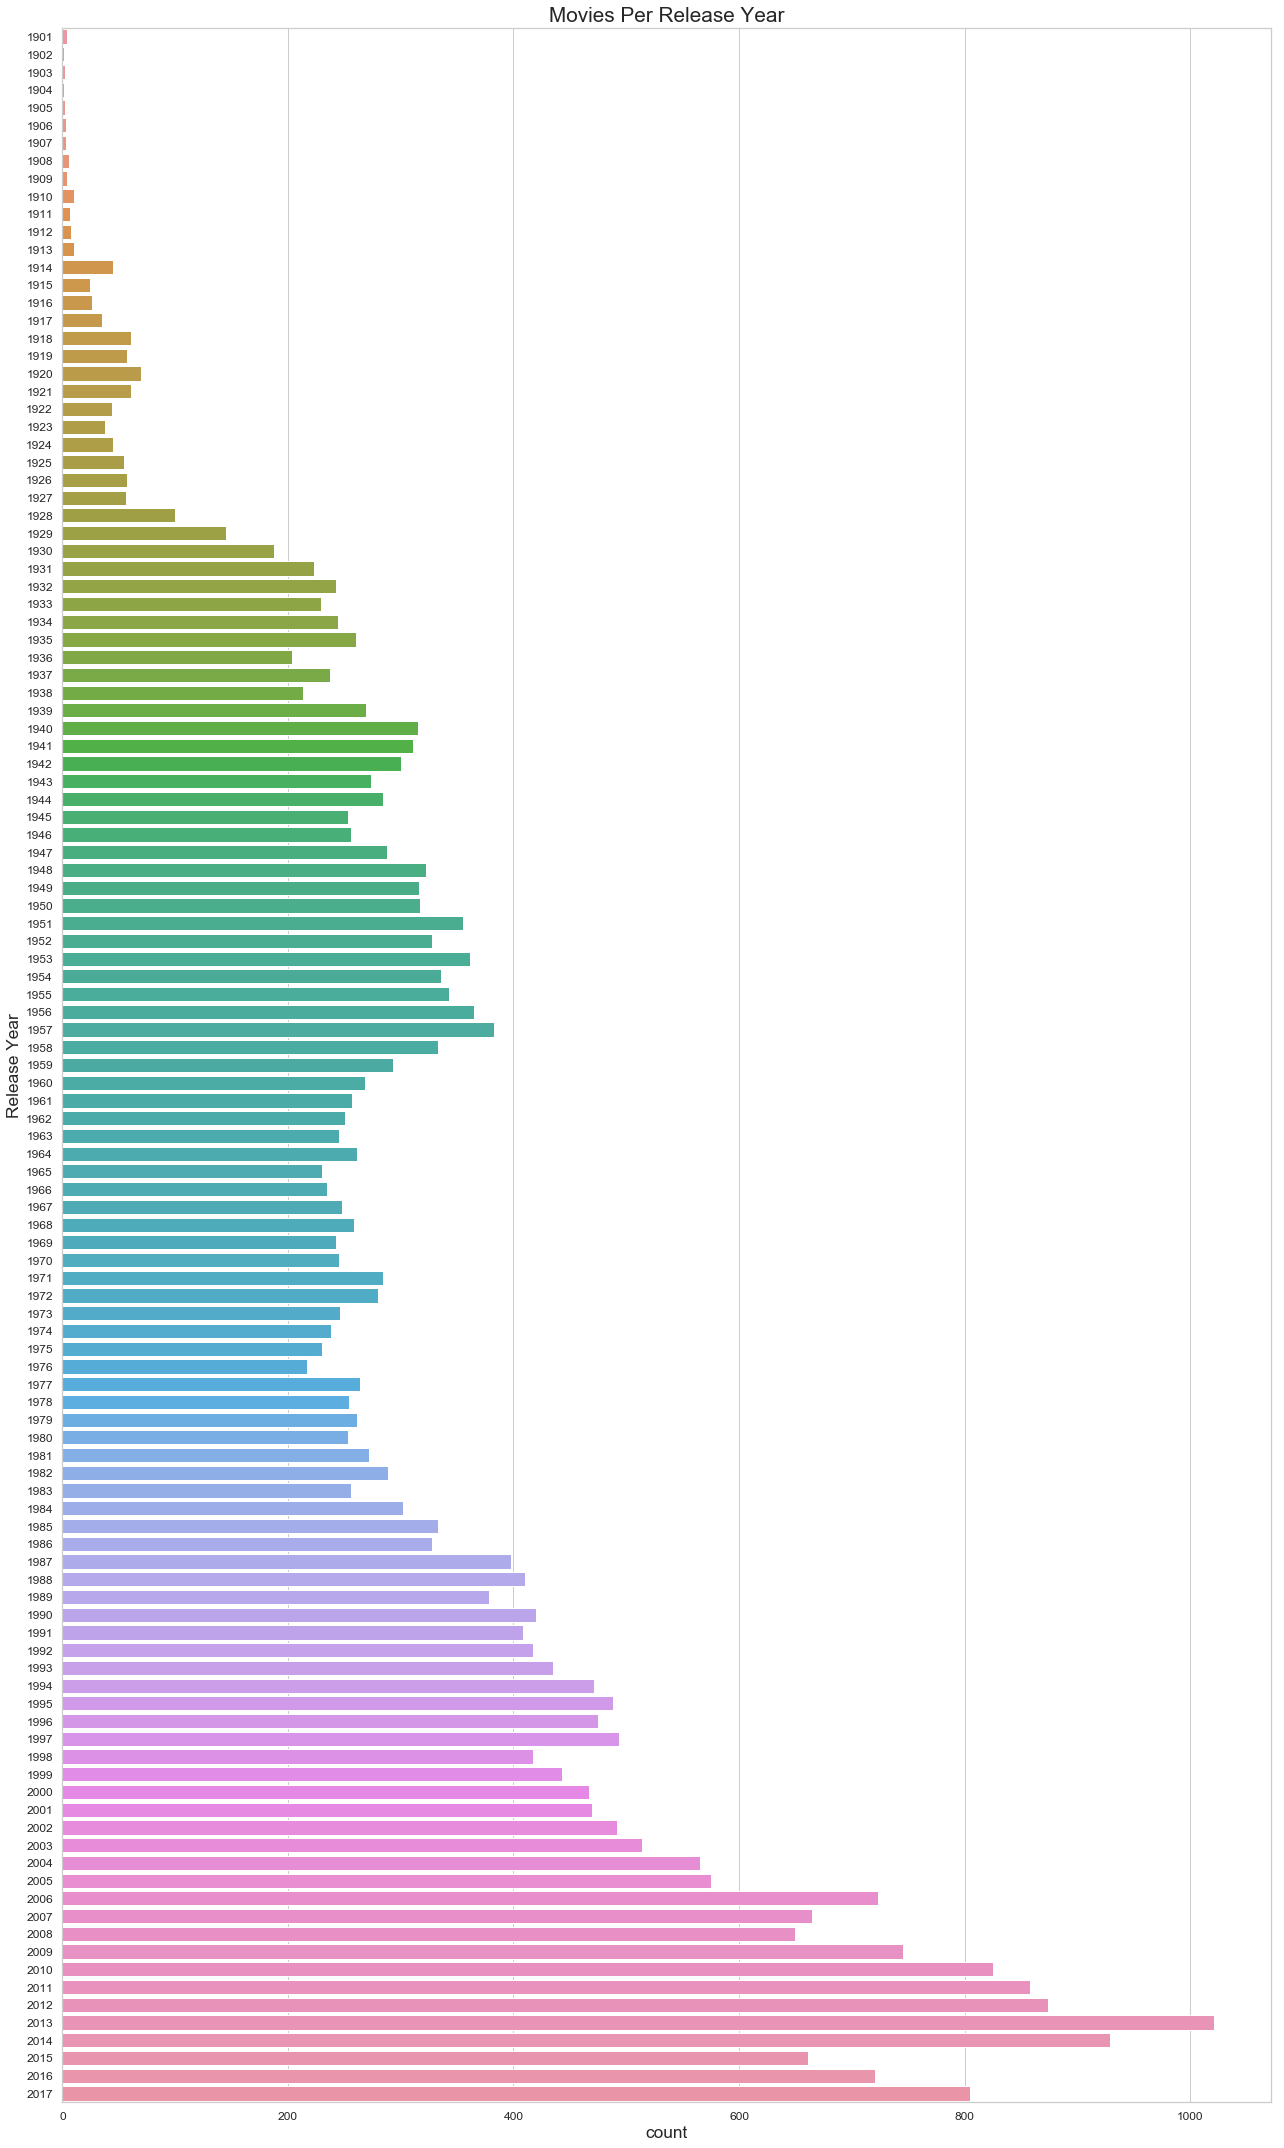

In [7]:
sns.set(style="whitegrid")

figsize=(18, 30)
xcol = "Release Year"

params = get_param()

plt.rcParams.update(params)
plt.tick_params(labelsize=12)
sns.countplot(y=movies[xcol], data=movies)
plt.title("Movies Per "+ xcol)

plt.tight_layout()
plt.show()

### The above Plot tells us that the movie count is increasing every year and maximum movies where released in the year 2013 while least movies were released in the year 1902

## Movie Count Per Origin

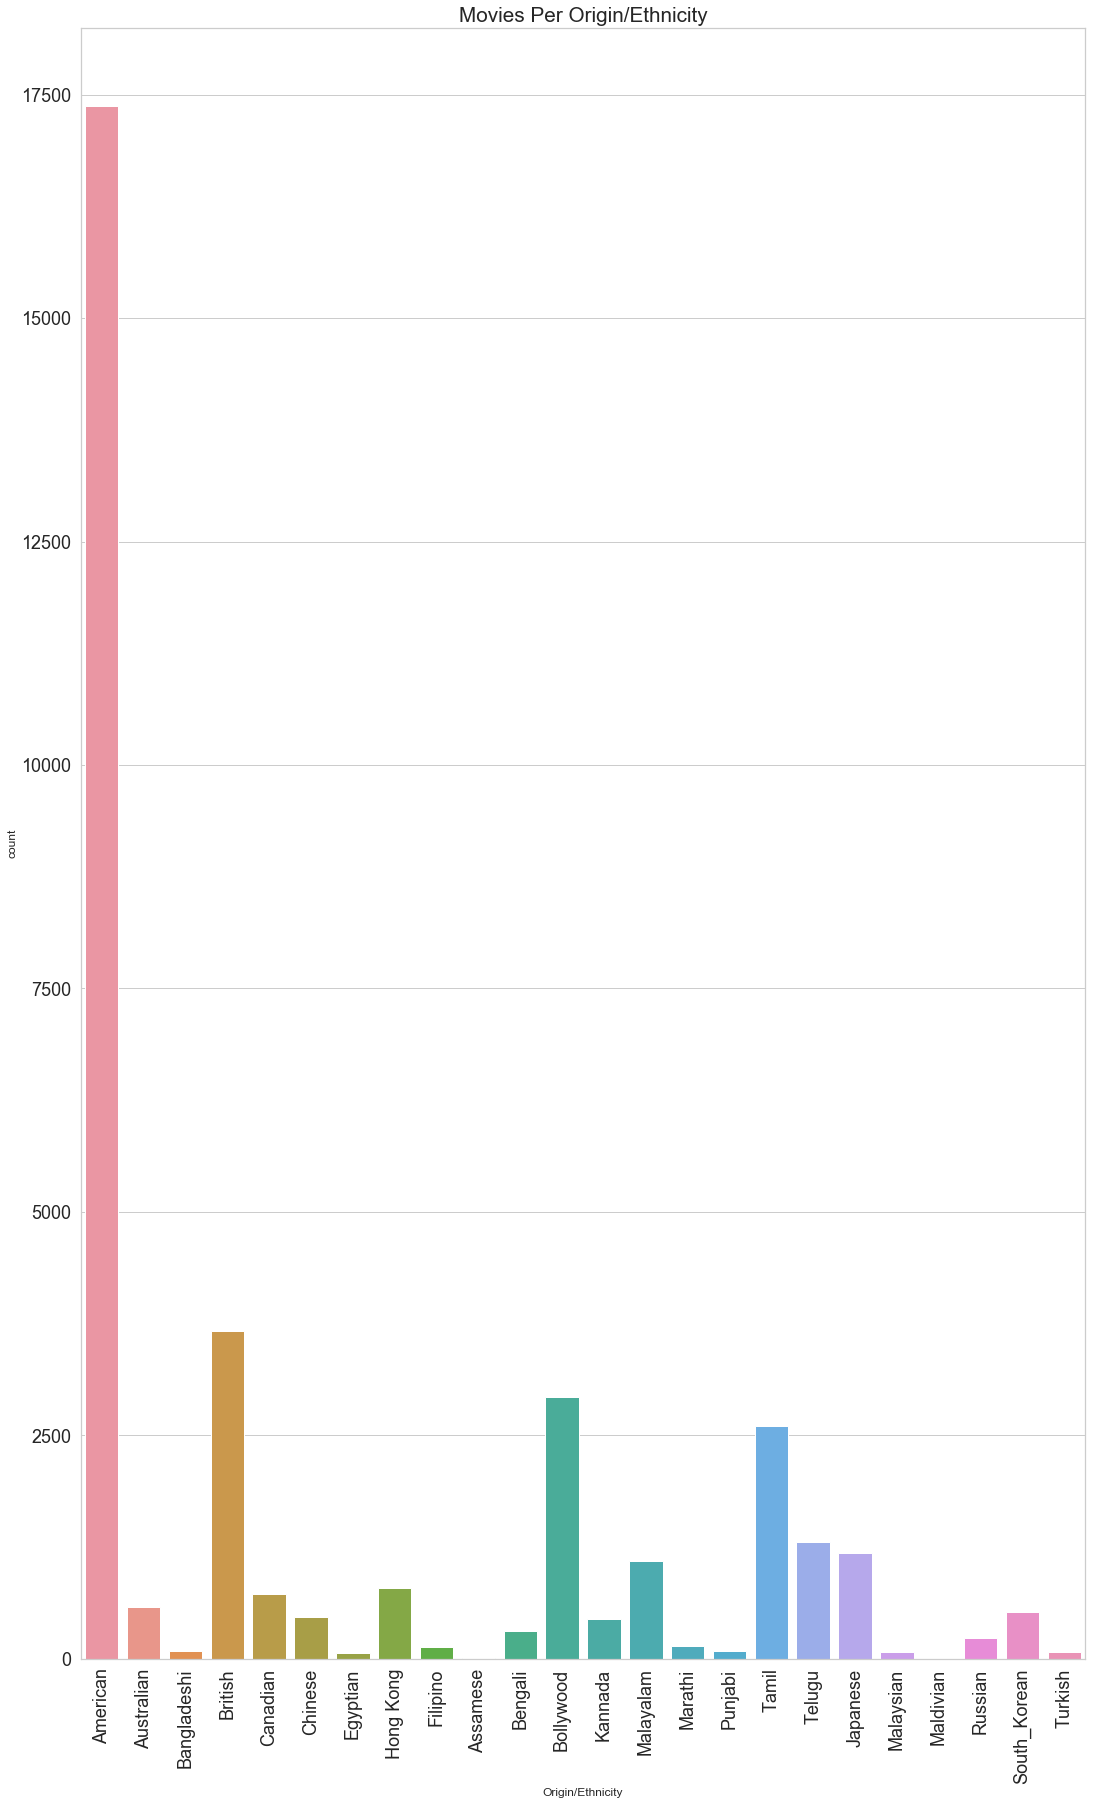

In [8]:
# sns.set(style="ticks")
sns.set(style="whitegrid")

figsize=(18, 10)
xcol = "Origin/Ethnicity"

params = get_param()
plt.tick_params(labelsize=18)
plt.rcParams.update(params)
sns.countplot(x=movies[xcol], data=movies)
plt.title("Movies Per "+ xcol)

plt.xticks(rotation=90)
# plt.yticks(rotation=90)
# plt.tight_layout()
plt.show()

### Above Plot tells that the count of American Origin movies is the most while other Origin/Ethnicity movies were below average count.

## Movie Graph Per Release Year Per Origin 

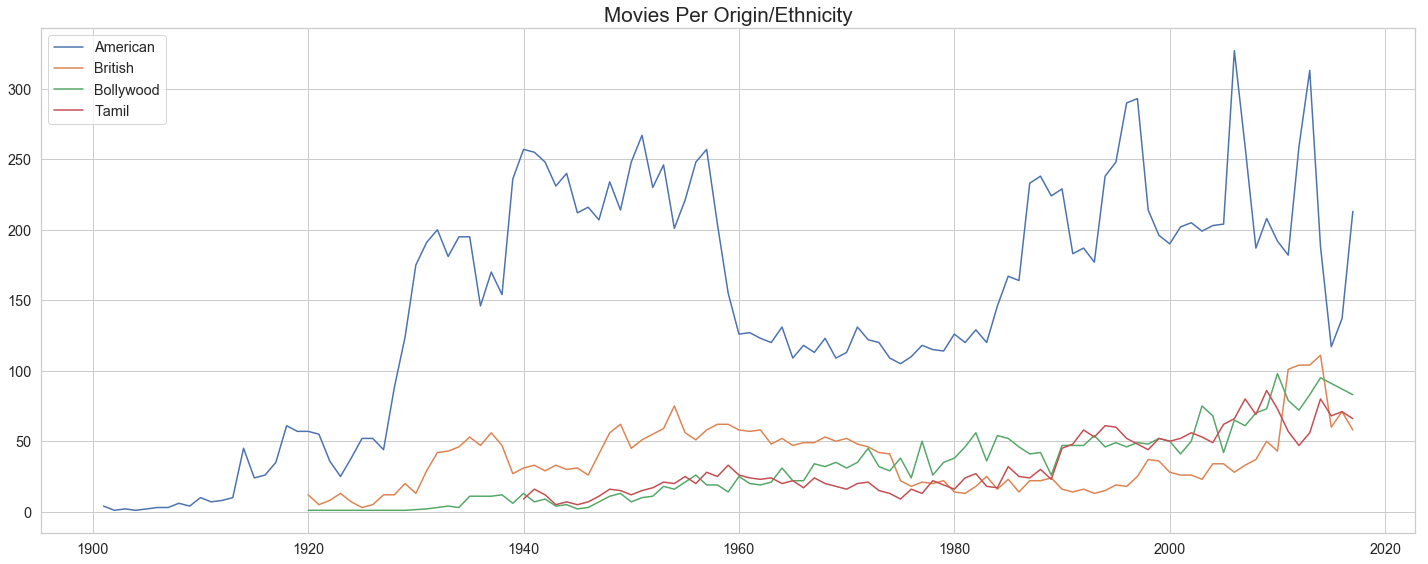

In [9]:
# sns.set(style="ticks")
sns.set(style="whitegrid")

figsize=(20, 8)
xcol = "Origin/Ethnicity"
params = get_param()
plt.rcParams.update(params)
org = movies[xcol].unique()
l = len(movies[xcol])
con = []
for country in movies[xcol].unique():
    c = movies[movies[xcol]==country]
    if len(c)>l*0.04:
        x = movies[movies[xcol]==country]["Release Year"].value_counts()
        sns.lineplot(x.index, x.values)
        con.append(country)
plt.legend(con)
plt.title("Movies Per "+ xcol)
plt.tight_layout()
plt.show()

### Above Plot shows America Origin movies count is the most while Bollywood Origin movies count is increasing steadily over the years.

## Movie Count Per Genre

In [10]:
xcol = "Genre"
df1 = pd.DataFrame({xcol:movies[xcol]})
df1[xcol] = df1[xcol].fillna("None")
df1[xcol] = df1[xcol].apply(lambda x: re.sub("[\(\)]", "", x))
df1[xcol] = df1[xcol].apply(lambda x: re.sub(" & ", ", ", x))
df1[xcol] = df1[xcol].apply(lambda x: re.sub(" and ", ", ", x))
df1[xcol] = df1[xcol].apply(lambda x: re.sub("/", ", ", x))

l = list()
for index, row in df1.iterrows():
    t = row[xcol].split(", ")
    l.extend([i.strip() for i in t])

df1 = pd.DataFrame({xcol:l})

c = df1[xcol].value_counts()
df1 = pd.DataFrame({xcol:c.index, "Count":c.values})
df1 = df1[df1[xcol]!="None"]
df1 = df1[df1[xcol]!="unknown"]
df1[xcol] = df1[xcol].apply(lambda x: x.capitalize())


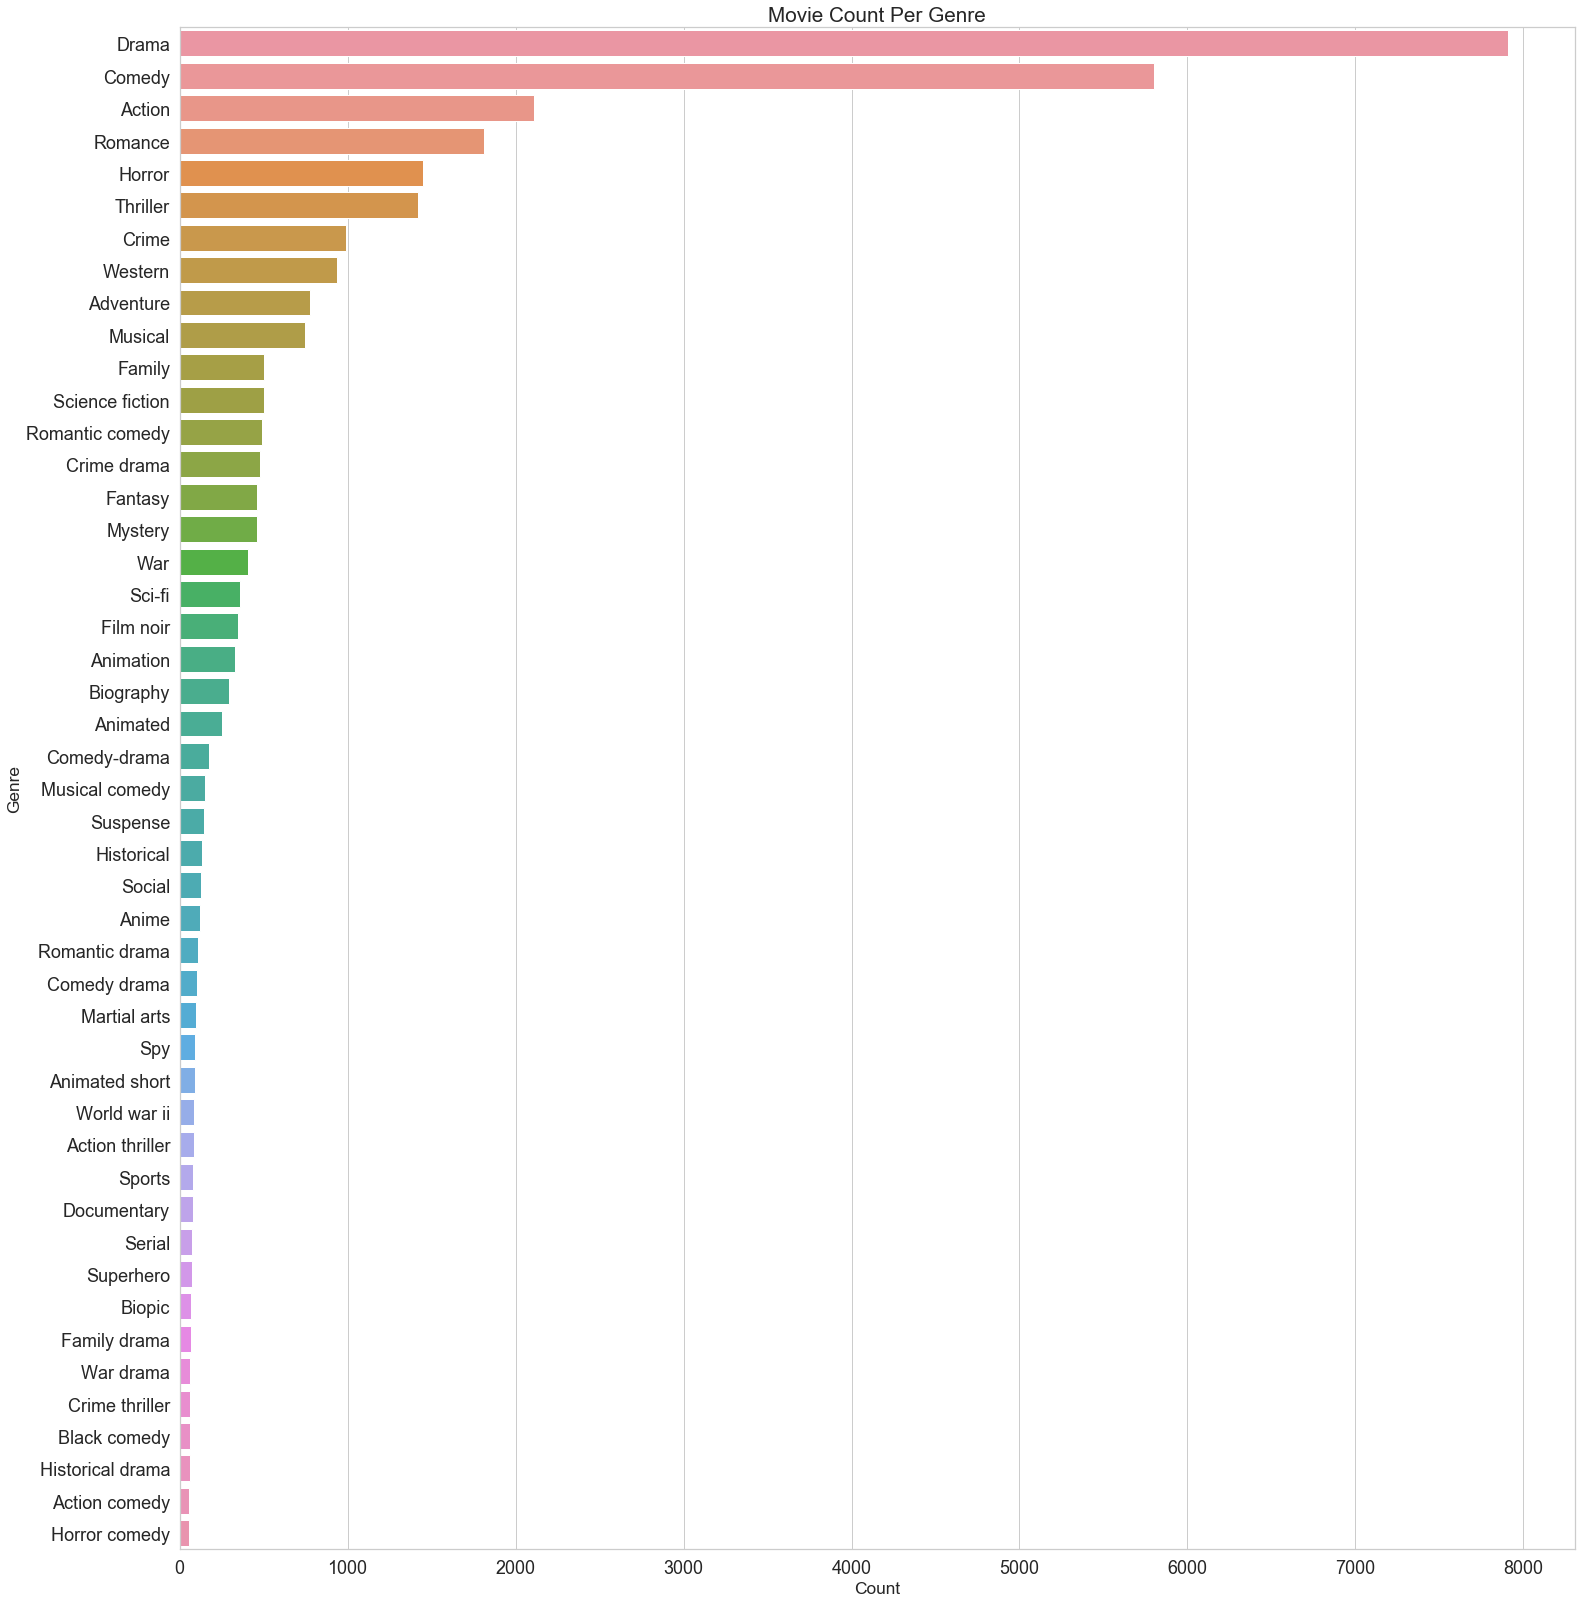

In [11]:
n_show = 50
df2 = df1[df1["Count"]>n_show]
# print(len(df2))

# sns.set(style="ticks")
sns.set(style="whitegrid")

figsize=(25, 28)
xcol = xcol

params = get_param()

plt.rcParams.update(params)
plt.tick_params(labelsize=18)
sns.barplot(x=df2["Count"], y=df2[xcol])
plt.title("Movie Count Per "+ xcol)
# plt.xticks(rotation=90)
# plt.yticks(rotation=90)

plt.show()

### Above Plot tells us that count of Drama genre movies and Comedy genre movies are much more than the average count while other genres movies are much less than the average count.